## Importing Packages

In [1]:
import pandas as pd
import numpy as np

import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

i
me
my
myself
we
our
ours
ourselves
you
your
yours
yourself
yourselves
he
him
his
himself
she
her
hers
herself
it
its
itself
they
them
their
theirs
themselves



being


for





until



with

against
between
into
through
during
before
after
above
below


up
down

out

off
over
under
again
further
then
once
here
there

where
why
how
all
any

each
few
more
most
other
some
such
no

not
only
own
same

than
too
very
s
t


just
don

now

In [2]:
finance_ls = ['tender', 'benchmark', 'concession', 'submit', 'currency', 'reinvest', 'retain', 'distribution', 'retail', 'demand', 'purchase', 'stock', 'bullish', 'growth', 'analyst', 'bank', 'rating', 'partner','demand', 'supply', 'market', 'retail', 'stock', 'ebit', 'vwap', 'advt', 'tsr',
        "aggregate", "analysis", "overvaluation", "undervaluation", "convergence", "divergence", "steep", "glossary", "macd", "downtrend", "outperform", "underperform", "overbought", "transaction", "bond", "rating", "purchase", "acquisition", "improvement", "undervalue", "exceed", "equivalent", "intangible","parison", "conversion", "exponential","gdp", "inflation", "unemployment","ebit", "aggregate", "transaction", "vwap", "bond", "rating", "undervalue", "exceed", "advt", "analysis",
        "performer", "oslobor", "parison", "outperform", "na", "employ", "tsr", "vi", "glossary", "versus",
        "overvaluation", "undervaluation", "size", "ceo", "conversion", "exponential", "overbought", "criterion",
        "purchase", "annualize", "bracket", "acquisition", "improvement", "euro", "equivalent", "intangible",
        "constitution", "gdp", "fix", "headline", "comment", "iron", "mining", "block", "ton", "port", "investigation",
        "concession", "infrastructure", "mission", "grade", "lkr"
    ]

In [3]:
def unique_values(lst):
    return list(dict.fromkeys(lst))

finance_ls = unique_values(finance_ls)

In [3]:
def remove_stopwords(df):
    article_ls = ['a','an','the']
    aux_verb = ['have','has','had','having','be','been','do','does','did','doing','am','is','are','was','were','will','should','can']
    conjunctions = ['and','nor','but','or','so','as','both','if','because','as','when','while']
    prepositions = ['about','of','at','by','to','in','on','from','with']
    others = ['what','which','who','whom','this','that','these','those']
    nationalities = ['czech', 'austrian', 'norwegian', 'swedish', 'eur', 'danish', 'finnish', 'afghan', 'iranian', 'nigerian', 'african', 'french', 'south']
    finance_ls = ['tender', 'benchmark', 'concession', 'submit', 'currency', 'reinvest', 'retain', 'distribution', 'retail', 'demand', 'purchase', 'stock', 'bullish', 'growth', 'analyst', 'bank', 'rating', 'partner','demand', 'supply', 'market', 'retail', 'stock', 'ebit', 'vwap', 'advt', 'tsr',
        "aggregate", "analysis", "overvaluation", "undervaluation", "convergence", "divergence", "steep", "glossary", "macd", "downtrend", "outperform", "underperform", "overbought", "transaction", "bond", "rating", "purchase", "acquisition", "improvement", "undervalue", "exceed", "equivalent", "intangible","parison", "conversion", "exponential","gdp", "inflation", "unemployment","ebit", "aggregate", "transaction", "vwap", "bond", "rating", "undervalue", "exceed", "advt", "analysis",
        "performer", "oslobor", "parison", "outperform", "na", "employ", "tsr", "vi", "glossary", "versus",
        "overvaluation", "undervaluation", "size", "ceo", "conversion", "exponential", "overbought", "criterion",
        "purchase", "annualize", "bracket", "acquisition", "improvement", "euro", "equivalent", "intangible",
        "constitution", "gdp", "fix", "headline", "comment", "iron", "mining", "block", "ton", "port", "investigation",
        "concession", "infrastructure", "mission", "grade", "lkr"
    ]
    #finance_ls = unique_values(finance_ls)

    remove_ls = []
    [remove_ls.append(i) for i in article_ls if i in df.index]
    [remove_ls.append(i) for i in aux_verb if i in df.index]
    [remove_ls.append(i) for i in conjunctions if i in df.index]
    [remove_ls.append(i) for i in prepositions if i in df.index]
    [remove_ls.append(i) for i in others if i in df.index]
    [remove_ls.append(i) for i in nationalities if i in df.index]
    #[remove_ls.append(i) for i in finance_ls if i in df.index]

    df = df.drop(remove_ls)

    return(df)

## Importing Peace Countries as well as some manual calculations

In [4]:
# Read the tab-delimited file into a DataFrame
df_peace = pd.read_csv('data/peace_10K.txt', delimiter='\t')
df_peace = df_peace.drop('Unnamed: 1',axis=1)
df_peace = df_peace.set_index('Unnamed: 0')

In [5]:
df_peace.sum()

Australia         431095758
New Zealand        35652792
Sweden             39352148
Austria             3111471
Belgium            22114947
Denmark            10560771
Norway             14209454
Finland            11709112
Netherlands         7930109
Czech Republic      1522757
dtype: int64

In [6]:
df_peace.loc['the']

Australia         25966824
New Zealand        2258492
Sweden             2398086
Austria             184331
Belgium            1476553
Denmark             652475
Norway              860205
Finland             708941
Netherlands         484238
Czech Republic      113151
Name: the, dtype: int64

In [7]:
df_peace = df_peace/df_peace.sum()

In [8]:
df_peace

,Australia,New Zealand,Sweden,Austria,Belgium,Denmark,Norway,Finland,Netherlands,Czech Republic
Unnamed: 0,,,,,,,,,,
yogurt,0.000004,0.000011,1.016463e-07,4.178088e-06,7.234926e-07,9.469006e-08,7.037568e-08,3.416143e-07,2.522033e-07,0.000002
airplane,0.000004,0.000005,3.379739e-06,2.571131e-06,2.713097e-06,7.575204e-07,0.000000e+00,5.124214e-07,2.900338e-06,0.000003
esthetic,0.000006,0.000007,3.049389e-07,0.000000e+00,2.939189e-06,1.041591e-06,0.000000e+00,7.686322e-07,4.665762e-06,0.000002
aging,0.000003,0.000004,5.082315e-08,0.000000e+00,5.064448e-06,1.893801e-07,0.000000e+00,4.270179e-07,1.008813e-06,0.000004
aluminum,0.000023,0.000014,9.376871e-06,5.720767e-05,1.496725e-05,5.207953e-06,1.752354e-05,1.451861e-06,3.102101e-05,0.000011
...,...,...,...,...,...,...,...,...,...,...
zinc,0.000013,0.000003,5.285607e-06,0.000000e+00,2.726663e-05,6.912374e-06,1.689016e-06,5.978250e-07,9.079320e-06,0.000001
zip,0.000004,0.000005,6.657832e-06,0.000000e+00,2.713097e-06,9.469006e-08,0.000000e+00,0.000000e+00,1.008813e-06,0.000000
zoning,0.000003,0.000005,5.082315e-07,0.000000e+00,9.043657e-08,5.681403e-07,3.518784e-07,0.000000e+00,0.000000e+00,0.000005


In [9]:
df_peace.loc['the']

Australia         0.060234
New Zealand       0.063347
Sweden            0.060939
Austria           0.059242
Belgium           0.066767
Denmark           0.061783
Norway            0.060538
Finland           0.060546
Netherlands       0.061063
Czech Republic    0.074307
Name: the, dtype: float64

In [10]:
df_peace = df_peace.mean(1)
df_peace = df_peace.transpose()
df_peace['target'] = 1

In [11]:
df_peace

Unnamed: 0
yogurt      0.000002
airplane    0.000003
esthetic    0.000002
aging       0.000002
aluminum    0.000018
              ...   
zinc        0.000007
zip         0.000002
zoning      0.000001
zoo         0.000007
zoom        0.000003
Length: 10000, dtype: float64

In [188]:
#df_peace.to_csv('data/peaceful_averages.csv')

## Importing Non-peace countries

In [12]:
# Read the tab-delimited file into a DataFrame
df_nonpeace = pd.read_csv('data/nopeace_10K.txt', delimiter='\t')
df_nonpeace = df_nonpeace.drop('Unnamed: 1',axis=1)
df_nonpeace = df_nonpeace.set_index('Unnamed: 0')
df_nonpeace = df_nonpeace/df_nonpeace.sum()
df_nonpeace = df_nonpeace.mean(1)
df_nonpeace = df_nonpeace.transpose()
df_nonpeace['target'] = 0

## Combining the data

In [13]:
df = pd.concat([df_peace,df_nonpeace],axis=1)
df = df.transpose()
df = df.fillna(0)

In [14]:
df

Unnamed: 0,yogurt,airplane,esthetic,aging,aluminum,amortization,amortize,analog,analyze,annex,...,wt,xad,yadav,yatra,yearold,yemeni,yorker,zimbabwean,zionist,zonal
0,0.000002,0.000003,0.000002,0.000002,0.000018,0.000102,0.000005,0.000005,0.000021,0.000009,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
1,0.000003,0.000005,0.000003,0.000002,0.000012,0.000023,0.000005,0.000003,0.000021,0.000004,...,6.821260e-07,3.901241e-07,4.876968e-07,3.716030e-07,3.556851e-07,0.000014,5.813657e-07,0.000068,0.000011,0.000005


In [189]:
df_nonpeace.to_csv('data/nonpeaceful_averages.csv')

## ML Code (in progress)

In [15]:
top_words = 1000

In [16]:
# Read the tab-delimited file into a DataFrame
df_peace = pd.read_csv('data/peace_10K.txt', delimiter='\t')
df_peace = df_peace.drop('Unnamed: 1',axis=1)
df_peace = df_peace.set_index('Unnamed: 0')
df_peace = remove_stopwords(df_peace)
df_peace = df_peace/df_peace.sum()
df_peace = df_peace.transpose()

sum1 = df_peace.sum()
sorted_series = sum1.sort_values(ascending=False)
# Display the sorted indices
top_indices = sorted_series.index.tolist()[:top_words]
df_peace = df_peace[top_indices]
df_peace['y_target'] = 1

In [17]:
# Read the tab-delimited file into a DataFrame
df_nonpeace = pd.read_csv('data/nopeace_10K.txt', delimiter='\t')
df_nonpeace = df_nonpeace.drop('Unnamed: 1',axis=1)
df_nonpeace = df_nonpeace.set_index('Unnamed: 0')
df_nonpeace = remove_stopwords(df_nonpeace)
df_nonpeace = df_nonpeace/df_nonpeace.sum()
df_nonpeace = df_nonpeace.transpose()

sum1 = df_nonpeace.sum()
sorted_series = sum1.sort_values(ascending=False)
# Display the sorted indices
top_indices = sorted_series.index.tolist()[:top_words]
df_nonpeace = df_nonpeace[top_indices]

df_nonpeace['y_target'] = 0

In [18]:
country_list = list(df_peace.index.values) + list(df_nonpeace.index.values)

In [19]:
list(df_nonpeace.index.values)

['India',
 'Iran',
 'Nigeria',
 'Kenya',
 'Congo',
 'Zimbabwe',
 'Sri Lanka',
 'Uganda',
 'Afghanistan',
 'Guinea']

In [20]:
country_list

['Australia',
 'New Zealand',
 'Sweden',
 'Austria',
 'Belgium',
 'Denmark',
 'Norway',
 'Finland',
 'Netherlands',
 'Czech Republic',
 'India',
 'Iran',
 'Nigeria',
 'Kenya',
 'Congo',
 'Zimbabwe',
 'Sri Lanka',
 'Uganda',
 'Afghanistan',
 'Guinea']

In [21]:
df_peace

Unnamed: 0,year,price,for,share,stock,average,total,section,month,up,...,response,away,wide,defer,personal,career,roe,en,conduct,y_target
Australia,0.020267,0.012453,0.017356,0.009052,0.007882,0.006641,0.007970,0.007963,0.006885,0.006907,...,0.000181,0.000251,0.000198,0.000068,0.000202,0.000297,0.000076,0.000022,0.000171,1
New Zealand,0.011019,0.004944,0.018757,0.003139,0.002607,0.002598,0.003010,0.002332,0.003514,0.006357,...,0.000292,0.000684,0.000253,0.000041,0.000224,0.000328,0.000034,0.000022,0.000132,1
Sweden,0.028005,0.030082,0.013544,0.014041,0.016080,0.015304,0.012021,0.014981,0.014903,0.011312,...,0.000018,0.000007,0.000031,0.000161,0.000073,0.000013,0.000168,0.000015,0.000060,1
Austria,0.027920,0.028417,0.012185,0.012490,0.016386,0.015253,0.015992,0.013357,0.013980,0.014063,...,0.000023,0.000006,0.000111,0.000219,0.000058,0.000091,0.000234,0.000007,0.000024,1
Belgium,0.014377,0.009858,0.020096,0.005466,0.005843,0.005699,0.005709,0.005499,0.005363,0.006247,...,0.000477,0.000155,0.000331,0.000100,0.000308,0.000252,0.000083,0.000992,0.000247,1
Denmark,0.024203,0.023034,0.015917,0.016335,0.013346,0.011969,0.011763,0.011392,0.011463,0.010751,...,0.000077,0.000011,0.000052,0.000157,0.000096,0.000037,0.000157,0.000079,0.000108,1
Norway,0.024615,0.024702,0.014148,0.019393,0.014107,0.012711,0.013142,0.012909,0.011239,0.012091,...,0.000033,0.000004,0.000079,0.000201,0.000022,0.000030,0.000125,0.000012,0.000057,1
Finland,0.027506,0.025023,0.013652,0.014648,0.014547,0.013763,0.014425,0.012225,0.011570,0.011662,...,0.000030,0.000007,0.000070,0.000215,0.000031,0.000053,0.000187,0.000024,0.000037,1
Netherlands,0.026058,0.022027,0.014867,0.013188,0.012551,0.013118,0.013476,0.012303,0.010902,0.010403,...,0.000097,0.000068,0.000112,0.000103,0.000139,0.000072,0.000189,0.000103,0.000171,1
Czech Republic,0.017310,0.010163,0.016939,0.005099,0.005184,0.005613,0.004711,0.005522,0.005431,0.004744,...,0.000063,0.000098,0.000051,0.000024,0.000135,0.000111,0.000029,0.000005,0.000273,1


In [22]:
val = 'Netherlands'  

df_X_peace = df_peace.copy(deep=True)
df_X_nonpeace = df_nonpeace.copy(deep=True)

if val in df_peace.index.values:
    y = df_peace.loc[val]
    df_X_peace = df_X_peace.drop([val])

else:
    y = df_nonpeace.loc[val]
    df_X_nonpeace = df_X_nonpeace.drop([val])

df_X_peace = df_X_peace.mean()
df_X_nonpeace = df_X_nonpeace.mean()

In [23]:
df = pd.concat([df_X_peace,df_X_nonpeace],axis=1)
df = df.transpose()
df = df.fillna(0)

y = pd.DataFrame(y).transpose()
df = pd.concat([df,y]).fillna(0)

In [24]:
test = df.iloc[-1:]
train = df.drop(val)

X_train = train.drop("y_target", axis=1)
y_train = train["y_target"]

X_test = test.drop("y_target", axis=1)
y_test = test["y_target"]

In [25]:
xt = np.log(X_train)
xt[xt < -1000000] = -99

c:\Users\91987\Documents\Columbia Engineering\Academic Documents\envs\ml_env\Lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [26]:
model = LogisticRegression()

model.fit(X_train, y_train)

print(model.predict_proba(X_test))

print(model.predict(X_test),y_test)

[[0.49985568 0.50014432]]
[1.] Netherlands    1.0
Name: y_target, dtype: float64


In [27]:
val = 'Netherlands'  

model = LogisticRegression()

def get_result(df_peace,df_nonpeace,val,model):

    df_X_peace = df_peace.copy(deep=True)
    df_X_nonpeace = df_nonpeace.copy(deep=True)

    if val in df_peace.index.values:
        y = df_peace.loc[val]
        df_X_peace = df_X_peace.drop([val])

    else:
        y = df_nonpeace.loc[val]
        df_X_nonpeace = df_X_nonpeace.drop([val])

    df_X_peace = df_X_peace.mean()
    df_X_nonpeace = df_X_nonpeace.mean()


    df = pd.concat([df_X_peace,df_X_nonpeace],axis=1)
    df = df.transpose()
    df = df.fillna(0)

    y = pd.DataFrame(y).transpose()
    df = pd.concat([df,y]).fillna(0)

    test = df.iloc[-1:]
    train = df.drop(val)

    X_train = train.drop("y_target", axis=1)
    y_train = train["y_target"]

    X_test = test.drop("y_target", axis=1)
    y_test = test["y_target"]

    #X_train = X_train * 1000000

    #X_test = X_test * 1000000

    X_train = np.log(X_train)

    X_test = np.log(X_test)

    X_train[X_train < -1000000] = -99

    X_test[X_test < -1000000] = -99

    # scaler = StandardScaler()

    # # Fit the scaler to your data and transform it
    # X_train = scaler.fit_transform(X_train)

    # X_test = scaler.transform(X_test)

    model.fit(X_train, y_train)

    #print(model.predict_proba(X_test))

    #print(model.predict(X_test),y_test)

    return(model.predict(X_test),y_test)

In [28]:
model_ls = [LogisticRegression(),RandomForestClassifier(random_state=1),xgb.XGBClassifier(random_state=1),DecisionTreeClassifier(random_state=1)]

for model in model_ls:

    print(model)
    pred_ls = []
    y_ls = []

    for i in country_list:
        #print(i)
        pred,y = get_result(df_peace,df_nonpeace,i,model)
        pred_ls.append(pred)
        y_ls.append(y)

    print(accuracy_score(pred_ls,y_ls))
    print(confusion_matrix(pred_ls,y_ls))

LogisticRegression()


c:\Users\91987\Documents\Columbia Engineering\Academic Documents\envs\ml_env\Lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\Users\91987\Documents\Columbia Engineering\Academic Documents\envs\ml_env\Lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\Users\91987\Documents\Columbia Engineering\Academic Documents\envs\ml_env\Lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\Users\91987\Documents\Columbia Engineering\Academic Documents\envs\ml_env\Lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\Users\91987\Documents\Columbia Engineering\Academic Documents\envs\ml_env\Lib\site-packages\pandas\core\internals

1.0
[[10  0]
 [ 0 10]]
RandomForestClassifier(random_state=1)


c:\Users\91987\Documents\Columbia Engineering\Academic Documents\envs\ml_env\Lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\Users\91987\Documents\Columbia Engineering\Academic Documents\envs\ml_env\Lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\Users\91987\Documents\Columbia Engineering\Academic Documents\envs\ml_env\Lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\Users\91987\Documents\Columbia Engineering\Academic Documents\envs\ml_env\Lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\Users\91987\Documents\Columbia Engineering\Academic Documents\envs\ml_env\Lib\site-packages\pandas\core\internals

0.9
[[ 8  0]
 [ 2 10]]
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)


c:\Users\91987\Documents\Columbia Engineering\Academic Documents\envs\ml_env\Lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\Users\91987\Documents\Columbia Engineering\Academic Documents\envs\ml_env\Lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\Users\91987\Documents\Columbia Engineering\Academic Documents\envs\ml_env\Lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\Users\91987\Documents\Columbia Engineering\Academic Documents\envs\ml_env\Lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\Users\91987\Documents\Columbia Engineering\Academic Documents\envs\ml_env\Lib\site-packages\pandas\core\internals

0.5
[[10 10]
 [ 0  0]]
DecisionTreeClassifier(random_state=1)


c:\Users\91987\Documents\Columbia Engineering\Academic Documents\envs\ml_env\Lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\Users\91987\Documents\Columbia Engineering\Academic Documents\envs\ml_env\Lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\Users\91987\Documents\Columbia Engineering\Academic Documents\envs\ml_env\Lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\Users\91987\Documents\Columbia Engineering\Academic Documents\envs\ml_env\Lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\Users\91987\Documents\Columbia Engineering\Academic Documents\envs\ml_env\Lib\site-packages\pandas\core\internals

0.75
[[7 2]
 [3 8]]


c:\Users\91987\Documents\Columbia Engineering\Academic Documents\envs\ml_env\Lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [28]:
# ## Multiply by million

# model_ls = [LogisticRegression(),RandomForestClassifier(),xgb.XGBClassifier(),DecisionTreeClassifier()]

# for model in model_ls:

#     print(model)
#     pred_ls = []
#     y_ls = []

#     for i in country_list:
#         print(i)
#         pred,y = get_result(df_peace,df_nonpeace,i,model)
#         pred_ls.append(pred)
#         y_ls.append(y)

#     print(accuracy_score(pred_ls,y_ls))
#     print(confusion_matrix(pred_ls,y_ls))

LogisticRegression()
Australia
[[0.02028773 0.97971227]]
New Zealand
[[9.99999998e-01 2.45673345e-09]]
Sweden
[[0. 1.]]
Austria
[[0. 1.]]
Belgium
[[0.97076744 0.02923256]]
Denmark
[[5.88862292e-13 1.00000000e+00]]
Norway
[[5.99520433e-15 1.00000000e+00]]
Finland
[[8.8817842e-16 1.0000000e+00]]
Netherlands
[[5.64481795e-12 1.00000000e+00]]
Czech Republic
[[9.99999631e-01 3.69445761e-07]]
India
[[0.86892371 0.13107629]]
Iran
[[2.20088260e-05 9.99977991e-01]]
Nigeria
[[9.99999999e-01 1.35891242e-09]]
Kenya
[[9.99999984e-01 1.57115824e-08]]
Congo
[[1.00000000e+00 2.40846321e-23]]
Zimbabwe
[[1.00000000e+00 5.12856212e-15]]
Sri Lanka
[[2.42584119e-07 9.99999757e-01]]
Uganda
[[1.00000000e+00 1.32326091e-14]]
Afghanistan
[[1.00000000e+00 8.86556662e-22]]
Guinea
[[1.00000000e+00 6.25700434e-11]]
0.75
[[8 3]
 [2 7]]
RandomForestClassifier()
Australia
[[0.35 0.65]]
New Zealand
[[0.51 0.49]]
Sweden
[[0.42 0.58]]
Austria
[[0.38 0.62]]
Belgium
[[0.43 0.57]]
Denmark
[[0.3 0.7]]
Norway
[[0.33 0.67]]
F

In [369]:
accuracy_score(pred_ls,y_ls)

0.9

In [372]:
print(classification_report(pred_ls,y_ls))

              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90        10
         1.0       0.90      0.90      0.90        10

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20



In [373]:
confusion_matrix(pred_ls,y_ls)

array([[9, 1],
       [1, 9]], dtype=int64)

In [ ]:
## Model Tuning v(not XGBOOST)
## Feature Importance
## Just seeing the split

In [29]:
import optuna

In [23]:
#from sklearn.model_selection import cross_val_score
def objective(trial):

    n_estimators = trial.suggest_int("n_estimators", 1, 200, log=True)
    max_depth = trial.suggest_int("max_depth", 1, top_words)

    rf_model = RandomForestClassifier(
    n_estimators=n_estimators,
    max_depth=max_depth,
    random_state=1,
    )
    
    pred_ls = []
    y_ls = []

    for i in country_list:
        pred,y = get_result(df_peace,df_nonpeace,i,rf_model)
        pred_ls.append(pred)
        y_ls.append(y)

    #print(accuracy_score(pred_ls,y_ls))


    return(accuracy_score(pred_ls,y_ls))

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
study = optuna.create_study(direction = "maximize")
study.optimize(objective, n_trials = 100)
trial = study.best_trial
print("Best Score: ", trial.value)
print("Best Params: ")
for key, value in trial.params.items():
    print("  {}: {}".format(key, value))

[I 2024-03-31 12:42:43,605] A new study created in memory with name: no-name-23620c74-b944-4e2b-86d5-3b2cb99f944f
[I 2024-03-31 12:42:44,397] Trial 0 finished with value: 1.0 and parameters: {'n_estimators': 9, 'max_depth': 370}. Best is trial 0 with value: 1.0.
[I 2024-03-31 12:42:45,586] Trial 1 finished with value: 0.9 and parameters: {'n_estimators': 36, 'max_depth': 239}. Best is trial 0 with value: 1.0.
[I 2024-03-31 12:42:46,488] Trial 2 finished with value: 0.9 and parameters: {'n_estimators': 13, 'max_depth': 110}. Best is trial 0 with value: 1.0.
[I 2024-03-31 12:42:47,288] Trial 3 finished with value: 0.75 and parameters: {'n_estimators': 5, 'max_depth': 631}. Best is trial 0 with value: 1.0.
[I 2024-03-31 12:42:48,668] Trial 4 finished with value: 0.9 and parameters: {'n_estimators': 51, 'max_depth': 694}. Best is trial 0 with value: 1.0.
[I 2024-03-31 12:42:49,539] Trial 5 finished with value: 0.9 and parameters: {'n_estimators': 12, 'max_depth': 525}. Best is trial 0 with

Best Score:  1.0
Best Params: 
  n_estimators: 9
  max_depth: 370


XGBOOST

In [207]:
#from sklearn.model_selection import cross_val_score
def objective(trial):

    params =    { 'n_estimators': trial.suggest_int('n_estimators', 10, 100),
        'max_depth': trial.suggest_int('max_depth', 2, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'lambda': trial.suggest_float('lambda', 0, 5),
        'alpha': trial.suggest_float('alpha', 0, 5),
    }

    xgboost = xgb.XGBClassifier(**params)
    
    pred_ls = []
    y_ls = []

    for i in country_list:
        pred,y = get_result(df_peace,df_nonpeace,i,xgboost)
        pred_ls.append(pred)
        y_ls.append(y)

    #print(accuracy_score(pred_ls,y_ls))


    return(accuracy_score(pred_ls,y_ls))

In [208]:
study = optuna.create_study(direction = "maximize")
study.optimize(objective, n_trials = 100)
trial = study.best_trial
print("Best Score: ", trial.value)
print("Best Params: ")
for key, value in trial.params.items():
    print("  {}: {}".format(key, value))

[I 2024-02-01 11:28:48,546] A new study created in memory with name: no-name-191c7174-959f-45df-a6d4-d9ba7af9a84c
[I 2024-02-01 11:28:53,352] Trial 0 finished with value: 0.5 and parameters: {'n_estimators': 53, 'max_depth': 704, 'learning_rate': 0.025104362545683087, 'lambda': 4.926559026664882, 'alpha': 3.619909686472062}. Best is trial 0 with value: 0.5.
[I 2024-02-01 11:28:56,947] Trial 1 finished with value: 0.5 and parameters: {'n_estimators': 27, 'max_depth': 165, 'learning_rate': 0.07104510146764914, 'lambda': 3.8290456855042194, 'alpha': 0.4337256660625305}. Best is trial 0 with value: 0.5.
[I 2024-02-01 11:29:00,137] Trial 2 finished with value: 0.5 and parameters: {'n_estimators': 20, 'max_depth': 238, 'learning_rate': 0.05834170350302338, 'lambda': 3.317827553897853, 'alpha': 4.75336526681844}. Best is trial 0 with value: 0.5.
[I 2024-02-01 11:29:07,024] Trial 3 finished with value: 0.5 and parameters: {'n_estimators': 98, 'max_depth': 123, 'learning_rate': 0.09337104251935

KeyboardInterrupt: 

Decision Tree

In [142]:
#from sklearn.model_selection import cross_val_score
def objective(trial):
    
    clf = DecisionTreeClassifier(
        max_depth=trial.suggest_int("max_depth", 2, top_words),
        max_features=trial.suggest_categorical("max_features", ["auto", "sqrt", "log2"]),
        criterion=trial.suggest_categorical("criterion", ["gini", "entropy"]),
        splitter=trial.suggest_categorical("splitter", ["best", "random"])
    )
    
    pred_ls = []
    y_ls = []

    for i in country_list:
        pred,y = get_result(df_peace,df_nonpeace,i,clf)
        pred_ls.append(pred)
        y_ls.append(y)

    #print(accuracy_score(pred_ls,y_ls))


    return(accuracy_score(pred_ls,y_ls))

In [141]:
study = optuna.create_study(direction = "maximize")
study.optimize(objective, n_trials = 100)
trial = study.best_trial
print("Best Score: ", trial.value)
print("Best Params: ")
for key, value in trial.params.items():
    print("  {}: {}".format(key, value))

[I 2024-02-21 20:35:12,606] A new study created in memory with name: no-name-df4ec4cb-79ef-4103-a517-6b2b08c5ef0f
[I 2024-02-21 20:35:13,319] Trial 0 finished with value: 0.75 and parameters: {'max_depth': 291, 'max_features': 'log2', 'criterion': 'gini', 'splitter': 'random'}. Best is trial 0 with value: 0.75.
[I 2024-02-21 20:35:13,931] Trial 1 finished with value: 0.8 and parameters: {'max_depth': 153, 'max_features': 'log2', 'criterion': 'entropy', 'splitter': 'best'}. Best is trial 1 with value: 0.8.
[I 2024-02-21 20:35:14,624] Trial 2 finished with value: 0.75 and parameters: {'max_depth': 789, 'max_features': 'sqrt', 'criterion': 'gini', 'splitter': 'random'}. Best is trial 1 with value: 0.8.
[I 2024-02-21 20:35:15,312] Trial 3 finished with value: 0.8 and parameters: {'max_depth': 667, 'max_features': 'sqrt', 'criterion': 'entropy', 'splitter': 'best'}. Best is trial 1 with value: 0.8.
[I 2024-02-21 20:35:16,006] Trial 4 finished with value: 0.75 and parameters: {'max_depth': 6

KeyboardInterrupt: 

SVM

In [1]:
#from sklearn.model_selection import cross_val_score
def objective(trial):
    
    param = {
        'C': trial.suggest_loguniform('C', 1e-10, 1e10),
        'kernel': trial.suggest_categorical('kernel', ['linear']),
        'gamma': trial.suggest_categorical('gamma', ['scale', 'auto']),
        'degree': trial.suggest_int('degree', 1, 5)
    }

    clf = SVC(**param,random_state=42)
    
    pred_ls = []
    y_ls = []

    for i in country_list:
        pred,y = get_result(df_peace,df_nonpeace,i,clf)
        pred_ls.append(pred)
        y_ls.append(y)

    #print(accuracy_score(pred_ls,y_ls))


    return(accuracy_score(pred_ls,y_ls))

In [2]:
study = optuna.create_study(direction = "maximize")
study.optimize(objective, n_trials = 100)
trial = study.best_trial
print("Best Score: ", trial.value)
print("Best Params: ")
for key, value in trial.params.items():
    print("  {}: {}".format(key, value))

NameError: name 'optuna' is not defined

In [35]:
# param = {
#         'C': 0.16682965933987087,
#         'kernel': 'linear',
#         'gamma': 'auto',
#         'degree': 3
#     }

# param = {
#         'C': 0.00032431908431380236,
#         'kernel': 'linear',
#         'gamma': 'auto',
#         'degree': 4
#     }

param = {
        'C': 0.0005336022538071572,
        'kernel': 'linear',
        'gamma': 'scale',
        'degree': 3
    }

clf = SVC(**param)

pred_ls = []
y_ls = []

for i in country_list:
    pred,y = get_result(df_peace,df_nonpeace,i,clf)
    pred_ls.append(pred)
    y_ls.append(y)

print(accuracy_score(pred_ls,y_ls))

1.0


In [126]:
df

Unnamed: 0,yogurt,airplane,esthetic,aging,aluminum,amortization,amortize,analog,analyze,annex,...,wt,xad,yadav,yatra,yearold,yemeni,yorker,zimbabwean,zionist,zonal
0,0.000002,0.000003,0.000002,0.000002,0.000018,0.000102,0.000005,0.000005,0.000021,0.000009,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
1,0.000003,0.000005,0.000003,0.000002,0.000012,0.000023,0.000005,0.000003,0.000021,0.000004,...,6.821260e-07,3.901241e-07,4.876968e-07,3.716030e-07,3.556851e-07,0.000014,5.813657e-07,0.000068,0.000011,0.000005


Random Forest Feature Importance

In [26]:
# n_estimators = 184
# max_depth = 234

n_estimators = 9
max_depth = 370

rf_model = RandomForestClassifier(
    n_estimators=n_estimators,
    max_depth=max_depth,
    random_state=1
    )

pred_ls = []
y_ls = []

for i in country_list:
    print(i)
    pred,y = get_result(df_peace,df_nonpeace,i,rf_model)
    pred_ls.append(pred)
    y_ls.append(y)

print(accuracy_score(pred_ls,y_ls))
print(confusion_matrix(pred_ls,y_ls))

Australia
New Zealand
Sweden
Austria
Belgium
Denmark
Norway
Finland
Netherlands
Czech Republic
India
Iran
Nigeria
Kenya
Congo
Zimbabwe
Sri Lanka
Uganda
Afghanistan
Guinea
1.0
[[10  0]
 [ 0 10]]


In [143]:
## DT Feature importance

max_depth = 442
max_features = 'sqrt'
criterion = 'gini'
splitter = 'random'


clf = DecisionTreeClassifier(
        max_depth=max_depth,
        max_features=max_features,
        criterion=criterion,
        splitter=splitter
    )

pred_ls = []
y_ls = []

for i in country_list:
    print(i)
    pred,y = get_result(df_peace,df_nonpeace,i,clf)
    pred_ls.append(pred)
    y_ls.append(y)

print(accuracy_score(pred_ls,y_ls))
print(confusion_matrix(pred_ls,y_ls))

Australia
New Zealand
Sweden
Austria
Belgium
Denmark
Norway
Finland
Netherlands
Czech Republic
India
Iran
Nigeria
Kenya
Congo
Zimbabwe
Sri Lanka
Uganda
Afghanistan
Guinea
0.85
[[8 1]
 [2 9]]


In [144]:
max_depth = 442
max_features = 'sqrt'
criterion = 'gini'
splitter = 'random'


clf = DecisionTreeClassifier(
        max_depth=max_depth,
        max_features=max_features,
        criterion=criterion,
        splitter=splitter
    )

In [36]:
df_X_peace = df_peace.copy(deep=True)
df_X_nonpeace = df_nonpeace.copy(deep=True)

In [37]:
df_X_peace = df_X_peace.mean()
df_X_nonpeace = df_X_nonpeace.mean()


df = pd.concat([df_X_peace,df_X_nonpeace],axis=1)
df = df.transpose()
df = df.fillna(0)

In [38]:
X_train = df.drop("y_target", axis=1)
y_train = df["y_target"]

In [39]:
X_train = np.log(X_train)

X_train[X_train < -1000000] = -99

In [40]:
# param = {
#         'C': 0.16682965933987087,
#         'kernel': 'linear',
#         'gamma': 'auto',
#         'degree': 3
#     }

# param = {
#         'C': 0.00032431908431380236,
#         'kernel': 'linear',
#         'gamma': 'auto',
#         'degree': 4
#     }

param = {
        'C': 0.0005336022538071572,
        'kernel': 'linear',
        'gamma': 'scale',
        'degree': 3
    }

clf = SVC(**param)

clf.fit(X_train,y_train)

SVC(C=0.0005336022538071572, kernel='linear')

In [41]:
clf.coef_

array([[ 4.21449126e-07,  4.88592455e-07, -8.01069918e-08, ...,
        -4.49329213e-05, -4.49327425e-05, -4.49325829e-05]])

In [42]:
#rf_model.fit(X_train,y_train)
clf.fit(X_train,y_train)

SVC(C=0.0005336022538071572, kernel='linear')

In [247]:
#rf_model.feature_importances_
#clf.feature_importances_

AttributeError: 'SVC' object has no attribute 'feature_importances_'

In [49]:
# Get feature importances
#importances = rf_model.feature_importances_
importances = clf.coef_[0]

features_list = X_train.columns.tolist()

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature rankings
print("Feature ranking:")

for f in range(len(features_list)):
    print(f"{f + 1}. feature {features_list[indices[f]]} ({importances[indices[f]]})")

Feature ranking:
1. feature click (4.550744817712526e-05)
2. feature minus (4.545721710567725e-05)
3. feature unfavorably (4.5323979502501426e-05)
4. feature length (4.527040632881472e-05)
5. feature buysellsignal (4.522036651376989e-05)
6. feature credit (4.521806711680674e-05)
7. feature quarterly (4.521752673450613e-05)
8. feature prise (4.521743638082811e-05)
9. feature wire (4.5215678028373084e-05)
10. feature vol (4.520998311439051e-05)
11. feature depreciation (4.5205343010347426e-05)
12. feature bin (4.5204879975098245e-05)
13. feature deteriorate (4.519854087082228e-05)
14. feature buzz (4.51974489058944e-05)
15. feature lift (4.519669408908489e-05)
16. feature announcement (4.5194942431105264e-05)
17. feature momentum (4.519487925834808e-05)
18. feature dutch (4.5194010844122774e-05)
19. feature unfavorable (4.519204207981691e-05)
20. feature marketing (4.518898793716031e-05)
21. feature descriptionvaluerank (4.518820148483437e-05)
22. feature liquidity (4.517563812854069e-05

In [50]:
for f in range(len(features_list[0:75])):
    print(f"{f + 1}. feature {features_list[indices[f]]} ({importances[indices[f]]})")

1. feature click (4.550744817712526e-05)
2. feature minus (4.545721710567725e-05)
3. feature unfavorably (4.5323979502501426e-05)
4. feature length (4.527040632881472e-05)
5. feature buysellsignal (4.522036651376989e-05)
6. feature credit (4.521806711680674e-05)
7. feature quarterly (4.521752673450613e-05)
8. feature prise (4.521743638082811e-05)
9. feature wire (4.5215678028373084e-05)
10. feature vol (4.520998311439051e-05)
11. feature depreciation (4.5205343010347426e-05)
12. feature bin (4.5204879975098245e-05)
13. feature deteriorate (4.519854087082228e-05)
14. feature buzz (4.51974489058944e-05)
15. feature lift (4.519669408908489e-05)
16. feature announcement (4.5194942431105264e-05)
17. feature momentum (4.519487925834808e-05)
18. feature dutch (4.5194010844122774e-05)
19. feature unfavorable (4.519204207981691e-05)
20. feature marketing (4.518898793716031e-05)
21. feature descriptionvaluerank (4.518820148483437e-05)
22. feature liquidity (4.517563812854069e-05)
23. feature opt

In [51]:
for f in range(len(features_list)-1,len(features_list)-76,-1):
    print(f"{f + 1}. feature {features_list[indices[f]]} ({importances[indices[f]]})")

1245. feature kill (-4.57664218294691e-05)
1244. feature district (-4.5761393477948694e-05)
1243. feature corruption (-4.5690259229126844e-05)
1242. feature mine (-4.567286827489817e-05)
1241. feature graphite (-4.5672095537178475e-05)
1240. feature peace (-4.565928585779273e-05)
1239. feature governor (-4.559927578049651e-05)
1238. feature opposition (-4.557090453743205e-05)
1237. feature presidential (-4.552365995284548e-05)
1236. feature arrest (-4.550844009064863e-05)
1235. feature nation (-4.547946537556383e-05)
1234. feature military (-4.543484138314258e-05)
1233. feature obtain (-4.543440332629449e-05)
1232. feature fight (-4.5429935829484375e-05)
1231. feature lack (-4.540299895697632e-05)
1230. feature death (-4.5397433222892685e-05)
1229. feature war (-4.5395474021204885e-05)
1228. feature accuse (-4.538782694711433e-05)
1227. feature especially (-4.538753301989607e-05)
1226. feature pursue (-4.5383959144458554e-05)
1225. feature violence (-4.538350144421379e-05)
1224. featur

In [48]:
# Get feature importances
n = 100

importances = rf_model.feature_importances_

features_list = X_train.columns.tolist()

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

top_n_indices = indices[:100]

ls_features = []

# Print the feature rankings
print("Feature ranking:")

for f in range(n):#features_list)):
    if importances[top_n_indices[f]] != 0:
        print(f"{f + 1}. feature {features_list[top_n_indices[f]]} ({importances[top_n_indices[f]]})")
        ls_features.append(features_list[top_n_indices[f]])

Feature ranking:
1. feature enter (0.3333333333333333)
2. feature pursue (0.3333333333333333)
3. feature july (0.3333333333333333)


In [40]:
df

Unnamed: 0,year,price,for,share,stock,average,total,section,month,up,...,respectively,amendment,instead,channel,northern,arrive,objective,text,illegal,culture
0,0.022041,0.018993,0.015689,0.011241,0.010810,0.010226,0.010182,0.009810,0.009487,0.009418,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.009673,0.007253,0.018777,0.004515,0.003601,0.003032,0.002910,0.003354,0.004409,0.004250,...,0.000196,0.000196,0.000196,0.000195,0.000195,0.000195,0.000194,0.000194,0.000193,0.000193


In [120]:
peace_ls = []
non_peace_ls = []

name_ls = []
logpeace_ls = []
lognon_peace_ls = []
realpeace_ls = []
realnon_peace_ls = []
log_ratio = []
real_ratio = []

for i in ls_features:
    print(X_train[[i]],'\n',df[[i]],'\n',df[i].idxmax(),'\n',X_train[[i]].values[0]/X_train[[i]].values[1])

    name_ls.append(i)
    logpeace_ls.append(X_train[[i]].values[0][0])
    lognon_peace_ls.append(X_train[[i]].values[1][0])
    realpeace_ls.append(df[[i]].values[0][0])
    realnon_peace_ls.append(df[[i]].values[1][0])
    log_ratio.append((X_train[[i]].values[0]/X_train[[i]].values[1])[0])
    real_ratio.append((df[[i]].values[0]/df[[i]].values[1])[0])


    if df[i].idxmax() == 0:
        peace_ls.append(i)
    else:
        non_peace_ls.append(i)


Unnamed: 0     tender
0          -99.000000
1           -7.306387 
 Unnamed: 0    tender
0           0.000000
1           0.000671 
 1 
 [13.54978857]
Unnamed: 0   partner
0          -8.177667
1          -7.879905 
 Unnamed: 0   partner
0           0.000281
1           0.000378 
 1 
 [1.03778744]
Unnamed: 0     think
0          -8.149284
1          -7.551694 
 Unnamed: 0     think
0           0.000289
1           0.000525 
 1 
 [1.07913331]
Unnamed: 0      come
0          -8.838188
1          -7.526644 
 Unnamed: 0      come
0           0.000145
1           0.000539 
 1 
 [1.17425345]
Unnamed: 0  benchmark
0           -6.464035
1           -8.043184 
 Unnamed: 0  benchmark
0            0.001558
1            0.000321 
 0 
 [0.80366626]
Unnamed: 0     accuse
0          -99.000000
1           -7.676759 
 Unnamed: 0    accuse
0           0.000000
1           0.000463 
 1 
 [12.89606642]
Unnamed: 0      year
0          -3.814872
1          -4.638414 
 Unnamed: 0      year
0           0.0220

In [74]:
peace_ls

['name',
 'daily',
 'pare',
 'indicator',
 'non',
 'equal',
 'system',
 'yield',
 'decline',
 'quarter',
 'move',
 'pany',
 'growth',
 'trade',
 'worth',
 'suggest',
 'profile',
 'positive',
 'point',
 'available',
 'property',
 'good',
 'volume',
 'officer',
 'define',
 'reinveste',
 'recent',
 'share',
 'fundamental',
 'week',
 'decrease',
 'may',
 'datum',
 'tax',
 'sell']

In [75]:
non_peace_ls

['help',
 'business',
 'back',
 'get',
 'institution',
 'note',
 'security',
 'peace',
 'among',
 'they',
 'force',
 'also',
 'leader',
 'attack',
 'no',
 'work',
 'new',
 'you',
 'economic',
 'win',
 'life',
 'law',
 'graphite',
 'express',
 'world',
 'city',
 'provide',
 'she',
 'export',
 'other',
 'people',
 'governor',
 'develop',
 'over',
 'same']

In [25]:
len(peace_ls)

35

In [26]:
len(non_peace_ls)

57

In [128]:
df_sp = pd.DataFrame(zip(name_ls,logpeace_ls,lognon_peace_ls,realpeace_ls,realnon_peace_ls,log_ratio,real_ratio),columns=['word','log_peace_value','log_nonpeace_value','real_peace_value','real_nonpeace_value','log_ratio','real_ratio'])
df_sp.to_csv('words_1000_data.csv',index=False)
a = 0.05
df_sp = df_sp.loc[~((df_sp['log_ratio']>=1-a) & (df_sp['log_ratio']<=1+a))]
ls_features = [i for i in ls_features if i in df_sp['word'].unique()]

In [122]:
X_t = df.drop("y_target", axis=1)

In [251]:
dict_peace = {}
n_dict = 50
n = 0

for i in ls_features:
    #print(X_train[[i]].values[0][0])
    if X_t[[i]].values[0] != 0:
        dict_peace[i] = X_t[[i]].values[0][0]
        n = n + 1

    if n == n_dict:
        break

n = 0
dict_nonpeace = {}
for i in ls_features:
    #print(X_train[[i]].values[1][0])
    if X_t[[i]].values[1] != 0:
        dict_nonpeace[i] = X_t[[i]].values[1][0]
        n = n + 1

    if n == n_dict:
        break

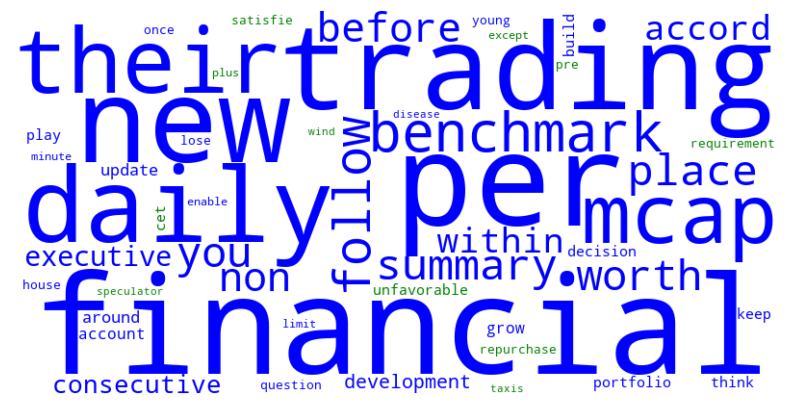

In [235]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud image
#wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(dict_peace)

# Display the generated image:

list_peace = list(set(dict_peace.keys()) - set(dict_nonpeace.keys()))

def custom_color_func_peace(word,word_list, **kwargs):
    if word in word_list:
        return 'green'
    else:
        return 'blue'  # Default color

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                      color_func=lambda word, **kwargs: custom_color_func_peace(word, list_peace, **kwargs)
                     ).generate_from_frequencies(dict_peace)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


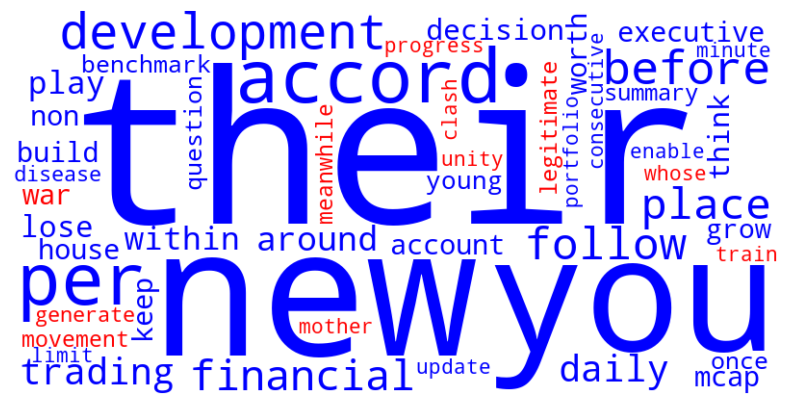

In [236]:
list_nonpeace = list(set(dict_nonpeace.keys()) - set(dict_peace.keys()))

def custom_color_func_nonpeace(word,word_list, **kwargs):
    if word in word_list:
        return 'red'
    else:
        return 'blue'  # Default color

wordcloud = WordCloud(width=800, height=400, background_color='white', 
                      color_func=lambda word, **kwargs: custom_color_func_nonpeace(word, list_nonpeace, **kwargs)
                     ).generate_from_frequencies(dict_nonpeace)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Unnamed: 0      react
0          -10.611583
1           -9.702175 
 1 
 [1.0937323]
Unnamed: 0   protect
0          -9.037474
1          -8.247500 
 1 
 [1.09578345]
Unnamed: 0      krone
0           -9.956742
1          -99.000000 
 0 
 [0.10057315]
Unnamed: 0  probably
0          -9.501798
1          -9.547642 
 0 
 [0.99519846]
Unnamed: 0     recall
0          -10.577775
1           -9.112526 
 1 
 [1.16079506]
Unnamed: 0   cyclical
0           -8.546105
1          -99.000000 
 0 
 [0.0863243]
Unnamed: 0   killing
0          -99.00000
1           -8.95997 
 1 
 [11.04914444]
Unnamed: 0  legislative
0            -10.536906
1             -9.020223 
 1 
 [1.16814244]
Unnamed: 0  purchase
0          -7.917477
1          -8.603677 
 0 
 [0.92024343]
Unnamed: 0        we
0          -5.806477
1          -4.969961 
 1 
 [1.16831435]
Unnamed: 0  extensive
0           -8.358532
1           -9.265786 
 0 
 [0.90208555]
Unnamed: 0       mile
0          -10.657232
1          -10.216840 
 1 
 [1.04310453]
Unnamed: 0   footnote
0          -99.000000
1           -9.340273 
 1 
 [10.59926168]
Unnamed: 0  scientist
0          -10.066413
1           -9.866155 
 1 
 [1.02029754]
Unnamed: 0    gaming
0          -10.18187
1          -99.00000 
 0 
 [0.10284718]
Unnamed: 0       pose
0          -10.190338
1           -9.243693 
 1 
 [1.10240981]
Unnamed: 0    entity
0          -9.709919
1          -9.333832 
 1 
 [1.04029292]
Unnamed: 0      tweet
0          -10.547714
1           -9.353109 
 1 
 [1.12772279]
Unnamed: 0     inmate
0          -99.000000
1          -10.278009 
 1 
 [9.63221595]
Unnamed: 0   general
0          -7.193892
1          -7.194364 
 0 
 [0.9999344]
Unnamed: 0   ranking
0          -6.893348
1          -8.004750 
 0 
 [0.86115726]
Unnamed: 0  indicator
0           -5.691269
1           -6.868995 
 0 
 [0.82854463]
Unnamed: 0     accuse
0          -10.108341
1           -7.676759 
 1 
 [1.3167458]
Unnamed: 0       hide
0          -10.759142
1           -9.604350 
 1 
 [1.12023633]
Unnamed: 0  portfolio
0           -8.153572
1           -8.374943 
 0 
 [0.97356744]
Unnamed: 0     study
0          -8.247766
1          -7.636937 
 1 
 [1.0799835]
Unnamed: 0   engineer
0          -10.081697
1           -9.545113 
 1 
 [1.05621565]
Unnamed: 0        sri
0          -99.000000
1           -8.845777 
 1 
 [11.1917815]
Unnamed: 0     resume
0          -10.497350
1           -9.240787 
 1 
 [1.13598007]
Unnamed: 0  experience
0            -7.858511
1            -7.814195 
 1 
 [1.00567126]
Unnamed: 0  representative
0                -9.011747
1                -8.091010 
 1 
 [1.11379752]
Unnamed: 0  integration
0             -9.988183
1            -10.083615 
 0 
 [0.99053594]
Unnamed: 0  ordinaries
0             -9.12577
1            -99.00000 
 0 
 [0.0921795]
Unnamed: 0     punish
0          -99.000000
1          -10.178625 
 1 
 [9.72626468]
Unnamed: 0  integrated
0           -10.482634
1           -99.000000 
 0 
 [0.10588519]
Unnamed: 0   partner
0          -8.177667
1          -7.879905 
 1 
 [1.03778744]
Unnamed: 0  expensive
0          -10.413071
1           -9.808402 
 1 
 [1.06164807]
Unnamed: 0     keeps
0          -10.81835
1          -99.00000 
 0 
 [0.10927626]
Unnamed: 0      sized
0          -10.502588
1          -99.000000 
 0 
 [0.10608674]
Unnamed: 0    silver
0          -9.721821
1          -9.973181 
 0 
 [0.97479639]
Unnamed: 0  character
0          -10.256852
1           -9.699632 
 1 
 [1.05744755]
Unnamed: 0      huge
0          -9.621621
1          -8.536386 
 1 
 [1.12713043]
Unnamed: 0     store
0          -8.711584
1          -9.174189 
 0 
 [0.94957541]
Unnamed: 0    worker
0          -9.057600
1          -8.024767 
 1 
 [1.12870579]
Unnamed: 0        fur
0          -10.572858
1          -99.000000 
 0 
 [0.10679654]
Unnamed: 0    consult
0          -10.375059
1           -9.795149 
 1 
 [1.05920381]
Unnamed: 0     pound
0          -8.160983
1          -8.746188 
 0 
 [0.93309023]
Unnamed: 0       seal
0          -99.000000
1           -8.923289 
 1 
 [11.09456381]
Unnamed: 0  productivity
0              -9.359067
1              -9.668838 
 0 
 [0.96796202]
Unnamed: 0   graphite
0          -99.000000
1           -7.164147 
 1 
 [13.81881129]
Unnamed: 0     match
0          -9.018518
1          -7.924889 
 1 
 [1.13799931]
Unnamed: 0   reaffirm
0          -99.000000
1          -10.313885 
 1 
 [9.59871046]
Unnamed: 0   trainer
0          -10.70799
1          -99.00000 
 0 
 [0.10816152]
Unnamed: 0  solution
0          -7.715454
1          -8.162820 
 0 
 [0.9451947]
Unnamed: 0   attitude
0          -10.710294
1           -9.978335 
 1 
 [1.07335481]
Unnamed: 0        yoy
0           -9.226477
1          -99.000000 
 0 
 [0.09319674]
Unnamed: 0       novo
0          -10.823708
1          -99.000000 
 0 
 [0.10933038]
Unnamed: 0  construct
0          -10.364716
1           -9.124145 
 1 
 [1.13596576]
Unnamed: 0     point
0          -6.362672
1          -6.784910 
 0 
 [0.93776806]
Unnamed: 0      hand
0          -8.645762
1          -7.557199 
 1 
 [1.14404316]
Unnamed: 0       ago
0          -4.837196
1          -5.857017 
 0 
 [0.82588053]
Unnamed: 0      wear
0          -9.686938
1          -9.145449 
 1 
 [1.05920862]
Unnamed: 0     formal
0          -10.608805
1           -8.851481 
 1 
 [1.19853449]
Unnamed: 0    shelter
0          -99.000000
1          -10.319637 
 1 
 [9.59336093]
Unnamed: 0  principal
0           -9.297580
1           -9.217425 
 1 
 [1.00869594]
Unnamed: 0   benefit
0          -8.305929
1          -7.858396 
 1 
 [1.05694964]
Unnamed: 0  beneficiary
0            -99.000000
1             -9.535796 
 1 
 [10.3819333]
Unnamed: 0  consultancy
0            -10.296695
1            -99.000000 
 0 
 [0.10400702]
Unnamed: 0      earn
0          -9.306822
1          -8.813164 
 1 
 [1.05601374]
Unnamed: 0    billion
0          -10.515245
1          -10.221381 
 1 
 [1.02874997]
Unnamed: 0  kingdom
0          -99.0000
1           -9.0352 
 1 
 [10.95714501]
Unnamed: 0      draw
0          -9.352747
1          -7.888206 
 1 
 [1.18566208]
Unnamed: 0     ready
0          -9.429069
1          -8.488791 
 1 
 [1.11076699]
Unnamed: 0    border
0          -9.117458
1          -8.009858 
 1 
 [1.1382796]
Unnamed: 0     trend
0          -8.374846
1          -8.322567 
 1 
 [1.00628154]
Unnamed: 0  hydrogen
0          -10.76171
1          -99.00000 
 0 
 [0.10870414]
Unnamed: 0      test
0          -8.279209
1          -8.007132 
 1 
 [1.03397931]
Unnamed: 0    height
0          -99.00000
1          -10.15323 
 1 
 [9.75059191]
Unnamed: 0  campaign
0          -8.952806
1          -7.682396 
 1 
 [1.1653664]
Unnamed: 0     inter
0          -99.00000
1          -10.06518 
 1 
 [9.83588927]
Unnamed: 0  entertainment
0               -9.996464
1              -10.079969 
 0 
 [0.99171572]
Unnamed: 0      bear
0          -8.429404
1          -8.412927 
 1 
 [1.00195855]
Unnamed: 0        chf
0          -10.301369
1          -99.000000 
 0 
 [0.10405423]
Unnamed: 0       far
0          -7.429539
1          -6.822292 
 1 
 [1.08900926]
Unnamed: 0   improve
0          -6.671717
1          -7.253593 
 0 
 [0.91978096]
Unnamed: 0      deep
0          -9.693150
1          -9.051822 
 1 
 [1.07085079]
Unnamed: 0      cargo
0          -10.326316
1           -9.492519 
 1 
 [1.08783726]
Unnamed: 0  vegetable
0          -10.643571
1           -9.899570 
 1 
 [1.07515484]
Unnamed: 0   pletion
0          -9.692986
1          -8.774735 
 1 
 [1.10464719]
Unnamed: 0     thinly
0          -10.528327
1          -10.311649 
 1 
 [1.02101286]
Unnamed: 0  impossible
0            -10.83996
1            -10.07957 
 1 
 [1.07543873]
Unnamed: 0       pay
0          -7.290346
1          -6.943404 
 1 
 [1.04996713]
Unnamed: 0      teach
0          -10.298031
1           -9.223341 
 1 
 [1.11651845]

 words - 3162

Unnamed: 0     tender
0          -99.000000
1           -7.306387 
 1 
 [13.54978857]
Unnamed: 0   partner
0          -8.177667
1          -7.879905 
 1 
 [1.03778744]
Unnamed: 0     think
0          -8.149284
1          -7.551694 
 1 
 [1.07913331]
Unnamed: 0      come
0          -8.838188
1          -7.526644 
 1 
 [1.17425345]
Unnamed: 0  benchmark
0           -6.464035
1           -8.043184 
 0 
 [0.80366626]
Unnamed: 0     accuse
0          -99.000000
1           -7.676759 
 1 
 [12.89606642]
Unnamed: 0      year
0          -3.814872
1          -4.638414 
 0 
 [0.8224518]
Unnamed: 0       fact
0          -99.000000
1           -7.573267 
 1 
 [13.07229758]
Unnamed: 0       draw
0          -99.000000
1           -7.888206 
 1 
 [12.55038144]
Unnamed: 0     group
0          -6.947568
1          -6.637676 
 1 
 [1.04668684]
Unnamed: 0  reinveste
0           -7.051967
1           -8.068789 
 0 
 [0.87398086]
Unnamed: 0   violence
0          -99.000000
1           -7.685179 
 1 
 [12.88193759]
Unnamed: 0     chief
0          -7.095955
1          -7.102976 
 0 
 [0.99901153]
Unnamed: 0     nation
0          -99.000000
1           -7.480995 
 1 
 [13.2335339]
Unnamed: 0     matter
0          -99.000000
1           -7.543593 
 1 
 [13.1237203]
Unnamed: 0  concession
0           -99.000000
1            -7.518795 
 1 
 [13.1670038]
Unnamed: 0     submit
0          -99.000000
1           -7.970093 
 1 
 [12.42143595]
Unnamed: 0     datum
0          -7.148488
1          -7.879576 
 0 
 [0.90721741]
Unnamed: 0     afghan
0          -99.000000
1           -6.983903 
 1 
 [14.17545464]
Unnamed: 0       kill
0          -99.000000
1           -6.900999 
 1 
 [14.34574877]
Unnamed: 0     below
0          -7.405390
1          -8.270139 
 0 
 [0.89543721]
Unnamed: 0    suspect
0          -99.000000
1           -7.919039 
 1 
 [12.50151679]
Unnamed: 0  currency
0          -6.863834
1          -7.710648 
 0 
 [0.89017598]
Unnamed: 0     trail
0          -6.883281
1          -7.810094 
 0 
 [0.88133143]
Unnamed: 0      stay
0          -8.900039
1          -8.375723 
 1 
 [1.06259944]
Unnamed: 0       new
0          -6.076119
1          -5.691733 
 1 
 [1.06753408]
Unnamed: 0     kenyan
0          -99.000000
1           -8.374342 
 1 
 [11.82182452]
Unnamed: 0  diplomatic
0           -99.000000
1            -8.372261 
 1 
 [11.82476263]
Unnamed: 0  journalist
0           -99.000000
1            -8.361367 
 1 
 [11.84016929]
Unnamed: 0  decrease
0          -6.276667
1          -7.380710 
 0 
 [0.85041499]
Unnamed: 0      more
0          -6.367129
1          -5.974361 
 1 
 [1.06574219]
Unnamed: 0  university
0           -99.000000
1            -8.259441 
 1 
 [11.98628321]
Unnamed: 0        nse
0          -99.000000
1           -8.253308 
 1 
 [11.99519037]
Unnamed: 0      club
0          -99.00000
1           -8.24696 
 1 
 [12.00442343]
Unnamed: 0       soon
0          -99.000000
1           -8.229505 
 1 
 [12.02988545]
Unnamed: 0       ever
0          -99.000000
1           -8.220838 
 1 
 [12.04256761]
Unnamed: 0    defense
0          -99.000000
1           -8.157051 
 1 
 [12.13673842]
Unnamed: 0   country
0          -6.693535
1          -5.593372 
 1 
 [1.19669049]
Unnamed: 0     equal
0          -6.750881
1          -7.414940 
 0 
 [0.91044314]
Unnamed: 0  proceeding
0           -99.000000
1            -8.093555 
 1 
 [12.23195437]
Unnamed: 0     world
0          -7.419368
1          -6.876322 
 1 
 [1.0789732]
Unnamed: 0    natural
0           -8.873474
1          -99.000000 
 0 
 [0.08963105]
Unnamed: 0  resolution
0            -8.882535
1           -99.000000 
 0 
 [0.08972258]
Unnamed: 0      twice
0           -8.580571
1          -99.000000 
 0 
 [0.08667243]
Unnamed: 0    really
0          -8.564301
1          -8.552450 
 1 
 [1.0013857]
Unnamed: 0     client
0           -8.527177
1          -99.000000 
 0 
 [0.08613311]
Unnamed: 0  recovery
0          -8.052918
1          -8.416063 
 0 
 [0.956851]
Unnamed: 0  regulation
0            -8.474739
1            -8.230806 
 1 
 [1.02963654]
Unnamed: 0        vol
0           -8.067711
1          -99.000000 
 0 
 [0.08149203]
Unnamed: 0     retain
0           -8.068218
1          -99.000000 
 0 
 [0.08149715]
Unnamed: 0  distribution
0              -8.466235
1             -99.000000 
 0 
 [0.08551753]
Unnamed: 0     retail
0           -8.462011
1          -99.000000 
 0 
 [0.08547485]
Unnamed: 0    demand
0          -8.457946
1          -7.356394 
 1 
 [1.14974076]
Unnamed: 0    design
0          -8.100142
1          -8.538118 
 0 
 [0.94870343]
Unnamed: 0       try
0          -8.381875
1          -7.689616 
 1 
 [1.09002511]
Unnamed: 0      much
0          -8.196720
1          -7.612199 
 1 
 [1.07678742]
Unnamed: 0  extensive
0           -8.358532
1          -99.000000 
 0 
 [0.08442962]
Unnamed: 0        ep
0           -8.24009
1          -99.00000 
 0 
 [0.08323323]
Unnamed: 0     method
0           -8.297095
1          -99.000000 
 0 
 [0.08380904]
Unnamed: 0   control
0          -7.961657
1          -7.714479 
 1 
 [1.03204071]
Unnamed: 0  republic
0          -8.605775
1          -8.490558 
 1 
 [1.01357003]
Unnamed: 0  publication
0            -99.000000
1             -8.402919 
 1 
 [11.78162058]
Unnamed: 0    comment
0           -7.928183
1          -99.000000 
 0 
 [0.08008266]
Unnamed: 0     rating
0           -7.493675
1          -99.000000 
 0 
 [0.07569368]
Unnamed: 0      late
0          -7.519663
1          -7.444016 
 1 
 [1.01016209]
Unnamed: 0    feature
0           -8.860091
1          -99.000000 
 0 
 [0.08949586]
Unnamed: 0      land
0          -8.848930
1          -7.278475 
 1 
 [1.21576695]
Unnamed: 0    analyst
0           -8.818397
1          -99.000000 
 0 
 [0.08907471]
Unnamed: 0      home
0          -7.734607
1          -7.258942 
 1 
 [1.06552818]
Unnamed: 0  approach
0          -8.717730
1          -8.387475 
 1 
 [1.03937487]
Unnamed: 0      bank
0          -7.762320
1          -7.437013 
 1 
 [1.04374163]
Unnamed: 0  favorably
0           -8.710079
1          -99.000000 
 0 
 [0.0879806]
Unnamed: 0     shall
0          -8.698634
1          -8.399085 
 1 
 [1.03566441]
Unnamed: 0      know
0          -7.763166
1          -6.877711 
 1 
 [1.12874261]
Unnamed: 0      next
0          -7.789423
1          -7.348135 
 1 
 [1.06005436]
Unnamed: 0  authority
0           -8.659740
1           -7.584271 
 1 
 [1.1418026]
Unnamed: 0   produce
0          -7.863897
1          -7.600025 
 1 
 [1.03471989]
Unnamed: 0   purchase
0           -7.917477
1          -99.000000 
 0 
 [0.07997452]
Unnamed: 0   progress
0          -99.000000
1           -8.389538 
 1 
 [11.80041116]
Unnamed: 0  negative
0          -7.451191
1          -8.279854 
 0 
 [0.89991811]
Unnamed: 0  pandemic
0          -99.00000
1           -8.47692 
 1 
 [11.6787705]
Unnamed: 0     arrive
0          -99.000000
1           -8.542415 
 1 
 [11.58922915]
Unnamed: 0  understand
0           -99.000000
1            -8.486599 
 1 
 [11.66545094]
Unnamed: 0       out
0          -5.538408
1          -5.817942 
 0 
 [0.95195317]
Unnamed: 0      mitte
0          -99.000000
1           -8.426963 
 1 
 [11.74800404]
Unnamed: 0    airport
0          -99.000000
1           -8.435642 
 1 
 [11.73591769]
Unnamed: 0   bullish
0          -5.706755
1          -6.882178 
 0 
 [0.82920765]
Unnamed: 0     stock
0          -4.527272
1          -5.626616 
 0 
 [0.80461717]
Unnamed: 0    growth
0          -5.823283
1          -6.693132 
 0 
 [0.8700385]
Unnamed: 0  provincial
0           -99.000000
1            -8.409064 
 1 
 [11.7730113]
Unnamed: 0       text
0          -99.000000
1           -8.548674 
 1 
 [11.58074281]
Unnamed: 0      past
0          -4.821775
1          -5.825197 
 0 
 [0.82774461]

 words = 1000

Unnamed: 0      ratio
0           -5.755567
1          -99.000000 
 0 
 [0.05813704]
Unnamed: 0    quarter
0           -6.184174
1          -99.000000 
 0 
 [0.0624664]
Unnamed: 0        his
0          -99.000000
1           -5.378019 
 1 
 [18.40826436]
Unnamed: 0      trade
0           -5.814135
1          -99.000000 
 0 
 [0.05872864]
Unnamed: 0   previous
0           -6.262711
1          -99.000000 
 0 
 [0.06325971]
Unnamed: 0      they
0          -6.116121
1          -5.011271 
 1 
 [1.22047301]
Unnamed: 0       into
0          -99.000000
1           -6.446589 
 1 
 [15.35695798]
Unnamed: 0   section
0          -4.624390
1          -5.697492 
 0 
 [0.81165358]
Unnamed: 0  performance
0             -6.155429
1            -99.000000 
 0 
 [0.06217605]
Unnamed: 0        it
0          -5.099374
1          -4.712545 
 1 
 [1.08208493]
Unnamed: 0      daily
0           -6.161403
1          -99.000000 
 0 
 [0.06223639]

 100 words

Unnamed: 0      name
0          -6.445321
1          -6.940536 
 0 
 [0.92864891]
Unnamed: 0     daily
0          -6.161403
1          -7.088785 
 0 
 [0.86917617]
Unnamed: 0       help
0          -99.000000
1           -6.988275 
 1 
 [14.16658718]
Unnamed: 0       pare
0           -6.807535
1          -99.000000 
 0 
 [0.06876298]
Unnamed: 0  business
0          -6.624034
1          -6.560209 
 1 
 [1.0097291]
Unnamed: 0  indicator
0           -5.691269
1           -6.868995 
 0 
 [0.82854463]
Unnamed: 0        non
0           -6.780369
1          -99.000000 
 0 
 [0.06848857]
Unnamed: 0      back
0          -7.362770
1          -6.845998 
 1 
 [1.07548529]
Unnamed: 0       get
0          -7.227685
1          -6.685843 
 1 
 [1.08104316]
Unnamed: 0  institution
0             -99.00000
1              -7.08922 
 1 
 [13.96486412]
Unnamed: 0       note
0          -99.000000
1           -7.094967 
 1 
 [13.95355354]
Unnamed: 0   security
0          -99.000000
1           -6.508323 
 1 
 [15.21129262]
Unnamed: 0      equal
0           -6.750881
1          -99.000000 
 0 
 [0.06819072]
Unnamed: 0      peace
0          -99.000000
1           -7.115805 
 1 
 [13.91269203]
Unnamed: 0    system
0          -7.210598
1          -7.255225 
 0 
 [0.99384901]
Unnamed: 0     yield
0          -5.573084
1          -7.068830 
 0 
 [0.78840261]
Unnamed: 0    decline
0           -6.818793
1          -99.000000 
 0 
 [0.0688767]
Unnamed: 0      among
0          -99.000000
1           -7.146752 
 1 
 [13.85244612]
Unnamed: 0   quarter
0          -6.184174
1          -7.240012 
 0 
 [0.85416622]
Unnamed: 0      they
0          -6.116121
1          -5.011271 
 1 
 [1.22047301]
Unnamed: 0      force
0          -99.000000
1           -6.706166 
 1 
 [14.76253411]
Unnamed: 0      also
0          -6.212967
1          -5.512610 
 1 
 [1.12704626]
Unnamed: 0     leader
0          -99.000000
1           -6.911072 
 1 
 [14.32483931]
Unnamed: 0      move
0          -5.929593
1          -6.597786 
 0 
 [0.89872471]
Unnamed: 0     attack
0          -99.000000
1           -6.880816 
 1 
 [14.38782789]
Unnamed: 0        no
0          -6.639903
1          -6.306175 
 1 
 [1.05292075]
Unnamed: 0      work
0          -6.631285
1          -6.324875 
 1 
 [1.04844523]
Unnamed: 0      pany
0          -5.886434
1          -6.748917 
 0 
 [0.8722042]
Unnamed: 0       new
0          -6.076119
1          -5.691733 
 1 
 [1.06753408]
Unnamed: 0       you
0          -6.721305
1          -5.927811 
 1 
 [1.13385952]
Unnamed: 0    growth
0          -5.823283
1          -6.693132 
 0 
 [0.8700385]
Unnamed: 0  economic
0          -7.267468
1          -6.808732 
 1 
 [1.06737464]
Unnamed: 0     trade
0          -5.814135
1          -6.598479 
 0 
 [0.88113259]
Unnamed: 0      worth
0           -6.739024
1          -99.000000 
 0 
 [0.06807095]
Unnamed: 0        win
0          -99.000000
1           -6.961147 
 1 
 [14.22179458]
Unnamed: 0   suggest
0          -5.795976
1          -6.849419 
 0 
 [0.84619964]
Unnamed: 0       life
0          -99.000000
1           -6.973536 
 1 
 [14.19652745]
Unnamed: 0        law
0          -99.000000
1           -6.980121 
 1 
 [14.18313441]
Unnamed: 0    profile
0           -6.740234
1          -99.000000 
 0 
 [0.06808317]
Unnamed: 0   positive
0           -6.838855
1          -99.000000 
 0 
 [0.06907935]
Unnamed: 0   graphite
0          -99.000000
1           -7.164147 
 1 
 [13.81881129]
Unnamed: 0     point
0          -6.362672
1          -6.784910 
 0 
 [0.93776806]
Unnamed: 0  available
0           -7.463174
1          -99.000000 
 0 
 [0.07538559]
Unnamed: 0   property
0           -7.457628
1          -99.000000 
 0 
 [0.07532958]
Unnamed: 0      good
0          -6.364142
1          -6.432489 
 0 
 [0.98937484]
Unnamed: 0    express
0          -99.000000
1           -7.285919 
 1 
 [13.58785347]
Unnamed: 0    volume
0          -4.860958
1          -5.932394 
 0 
 [0.81939229]
Unnamed: 0   officer
0          -7.090494
1          -7.257209 
 0 
 [0.97702767]
Unnamed: 0     world
0          -7.419368
1          -6.876322 
 1 
 [1.0789732]
Unnamed: 0       city
0          -99.000000
1           -7.309047 
 1 
 [13.54485806]
Unnamed: 0    define
0           -6.96985
1          -99.00000 
 0 
 [0.07040253]
Unnamed: 0   provide
0          -7.075323
1          -6.546020 
 1 
 [1.08085877]
Unnamed: 0  reinveste
0           -7.051967
1          -99.000000 
 0 
 [0.07123199]
Unnamed: 0     recent
0           -7.022671
1          -99.000000 
 0 
 [0.07093607]
Unnamed: 0       she
0          -7.017955
1          -6.103005 
 1 
 [1.14991792]
Unnamed: 0    export
0          -99.00000
1           -7.34148 
 1 
 [13.48501865]
Unnamed: 0     share
0          -4.488179
1          -5.400420 
 0 
 [0.83107953]
Unnamed: 0  fundamental
0             -6.998112
1            -99.000000 
 0 
 [0.070688]
Unnamed: 0      week
0          -5.063630
1          -5.852971 
 0 
 [0.86513845]
Unnamed: 0    other
0          -6.01239
1          -5.70555 
 1 
 [1.05377925]
Unnamed: 0   decrease
0           -6.276667
1          -99.000000 
 0 
 [0.06340067]
Unnamed: 0    people
0          -6.889084
1          -5.659971 
 1 
 [1.21715896]
Unnamed: 0       may
0          -6.536659
1          -6.635162 
 0 
 [0.98515438]
Unnamed: 0  governor
0          -99.00000
1           -7.23885 
 1 
 [13.67620609]
Unnamed: 0    develop
0          -99.000000
1           -7.225189 
 1 
 [13.70206361]
Unnamed: 0      over
0          -6.324551
1          -5.959697 
 1 
 [1.06122019]
Unnamed: 0      same
0          -7.391742
1          -7.074301 
 1 
 [1.04487246]
Unnamed: 0      datum
0           -7.148488
1          -99.000000 
 0 
 [0.07220695]
Unnamed: 0       tax
0          -6.504979
1          -7.194176 
 0 
 [0.90420071]
Unnamed: 0       sell
0           -7.171071
1          -99.000000 
 0 
 [0.07243506]

 316 words

#green
#0.9 and 1.1 exclude
#spreadsheet for ratios
#Overview summarize for the project from the powerpoint
#cluster the words which topics differentiate (maybe ask AI)
#1 page summary report (not jargon filled - bullets max 100 word limit) 

In [52]:
for f in range(len(features_list[0:75])):
    print(f"{f + 1}. feature {features_list[indices[f]]} ({importances[indices[f]]})")

1. feature click (4.550744817712526e-05)
2. feature minus (4.545721710567725e-05)
3. feature unfavorably (4.5323979502501426e-05)
4. feature length (4.527040632881472e-05)
5. feature buysellsignal (4.522036651376989e-05)
6. feature credit (4.521806711680674e-05)
7. feature quarterly (4.521752673450613e-05)
8. feature prise (4.521743638082811e-05)
9. feature wire (4.5215678028373084e-05)
10. feature vol (4.520998311439051e-05)
11. feature depreciation (4.5205343010347426e-05)
12. feature bin (4.5204879975098245e-05)
13. feature deteriorate (4.519854087082228e-05)
14. feature buzz (4.51974489058944e-05)
15. feature lift (4.519669408908489e-05)
16. feature announcement (4.5194942431105264e-05)
17. feature momentum (4.519487925834808e-05)
18. feature dutch (4.5194010844122774e-05)
19. feature unfavorable (4.519204207981691e-05)
20. feature marketing (4.518898793716031e-05)
21. feature descriptionvaluerank (4.518820148483437e-05)
22. feature liquidity (4.517563812854069e-05)
23. feature opt

In [53]:
for f in range(len(features_list)-1,len(features_list)-76,-1):
    print(f"{f + 1}. feature {features_list[indices[f]]} ({importances[indices[f]]})")

1245. feature kill (-4.57664218294691e-05)
1244. feature district (-4.5761393477948694e-05)
1243. feature corruption (-4.5690259229126844e-05)
1242. feature mine (-4.567286827489817e-05)
1241. feature graphite (-4.5672095537178475e-05)
1240. feature peace (-4.565928585779273e-05)
1239. feature governor (-4.559927578049651e-05)
1238. feature opposition (-4.557090453743205e-05)
1237. feature presidential (-4.552365995284548e-05)
1236. feature arrest (-4.550844009064863e-05)
1235. feature nation (-4.547946537556383e-05)
1234. feature military (-4.543484138314258e-05)
1233. feature obtain (-4.543440332629449e-05)
1232. feature fight (-4.5429935829484375e-05)
1231. feature lack (-4.540299895697632e-05)
1230. feature death (-4.5397433222892685e-05)
1229. feature war (-4.5395474021204885e-05)
1228. feature accuse (-4.538782694711433e-05)
1227. feature especially (-4.538753301989607e-05)
1226. feature pursue (-4.5383959144458554e-05)
1225. feature violence (-4.538350144421379e-05)
1224. featur

In [254]:
dict_peace = {}
n_dict = 50
n = 0

for f in range(len(features_list[0:50])):
    #print(f"{f + 1}. feature {features_list[indices[f]]} ({importances[indices[f]]})")
    #print(X_train[[i]].values[0][0])
    if X_t[[features_list[indices[f]]]].values[0] != 0:
        dict_peace[features_list[indices[f]]] = X_t[[features_list[indices[f]]]].values[0][0]
        n = n + 1

    if n == n_dict:
        break

In [255]:
dict_peace

{'ebit': 0.0008421683898318126,
 'aggregate': 0.000741593115842085,
 'transaction': 0.0006632962445918435,
 'vwap': 0.0006624477247325022,
 'macd': 0.0006620677279399951,
 'bond': 0.0005976517602055752,
 'click': 0.0005734364424823523,
 'rating': 0.0005565939116768563,
 'undervalue': 0.0005490291650371006,
 'exceed': 0.0005336845878392598,
 'advt': 0.0005295206707962175,
 'analysis': 0.0005214637778552177,
 'minus': 0.0005161921234181717,
 'performer': 0.0005033924408047569,
 'oslobor': 0.0005022055812840964,
 'downtrend': 0.0004944349930725526,
 'parison': 0.00049001900249845,
 'outperform': 0.00046892065780206006,
 'na': 0.00045520942111877336,
 'employ': 0.00045606692323221944,
 'tsr': 0.0004501128723822169,
 'vi': 0.00043774383689840023,
 'glossary': 0.000430775253694379,
 'versus': 0.0004277889152915766,
 'overvaluation': 0.0004161133448621437,
 'undervaluation': 0.0004113931794433922,
 'convergence': 0.0004088224236574624,
 'size': 0.000404796871802482,
 'ceo': 0.0004045603905512

In [256]:
n = 0
dict_nonpeace = {}
for f in range(len(features_list)-1,len(features_list)-76,-1):
    print(f"{f + 1}. feature {features_list[indices[f]]} ({importances[indices[f]]})")
    #print(X_train[[i]].values[1][0])
    if X_t[[features_list[indices[f]]]].values[1] != 0:
        dict_nonpeace[features_list[indices[f]]] = X_t[[features_list[indices[f]]]].values[1][0]
        n = n + 1

    if n == n_dict:
        break

1269. feature constitution (-4.19104879138362e-05)
1268. feature iron (-4.182026822904559e-05)
1267. feature mining (-4.165988831288604e-05)
1266. feature kill (-4.1587933596863236e-05)
1265. feature district (-4.158392986355259e-05)
1264. feature institution (-4.150163726440279e-05)
1263. feature corruption (-4.1500529055800504e-05)
1262. feature peace (-4.149113476692828e-05)
1261. feature mine (-4.147664697901544e-05)
1260. feature graphite (-4.1468110669816034e-05)
1259. feature block (-4.1457460005182816e-05)
1258. feature governor (-4.143433935790658e-05)
1257. feature tender (-4.1403210739576604e-05)
1256. feature opposition (-4.1391155235079e-05)
1255. feature ton (-4.138808469915659e-05)
1254. feature port (-4.135663202513389e-05)
1253. feature mission (-4.135546128635494e-05)
1252. feature arrest (-4.13520839179003e-05)
1251. feature presidential (-4.135162096821934e-05)
1250. feature effort (-4.134151924162137e-05)
1249. feature investigation (-4.132683041786573e-05)
1248. f

In [257]:
dict_nonpeace

{'constitution': 0.002061813619810179,
 'iron': 0.001688052897752865,
 'mining': 0.0011835403220856137,
 'kill': 0.0010067790080363359,
 'district': 0.0009990706069099137,
 'institution': 0.0008340473134360787,
 'corruption': 0.0008316726067041844,
 'peace': 0.0008121668582532382,
 'mine': 0.0007882657593875957,
 'graphite': 0.0007738385246451964,
 'block': 0.0007561610785983162,
 'governor': 0.0007181373755830059,
 'tender': 0.0006712378127355356,
 'opposition': 0.0006530250500759253,
 'ton': 0.0006481773869640621,
 'port': 0.0006046031543522138,
 'mission': 0.0006029152918288821,
 'arrest': 0.0005991627046361837,
 'presidential': 0.0005979526382063532,
 'effort': 0.0005847968494953137,
 'investigation': 0.00056633297085777,
 'nation': 0.0005636962993247883,
 'concession': 0.0005427863254853915,
 'matter': 0.0005294919205951538,
 'military': 0.0005136972038227112,
 'fact': 0.0005140104253740609,
 'fight': 0.0005115455631568422,
 'infrastructure': 0.0004908668684384688,
 'request': 0.0

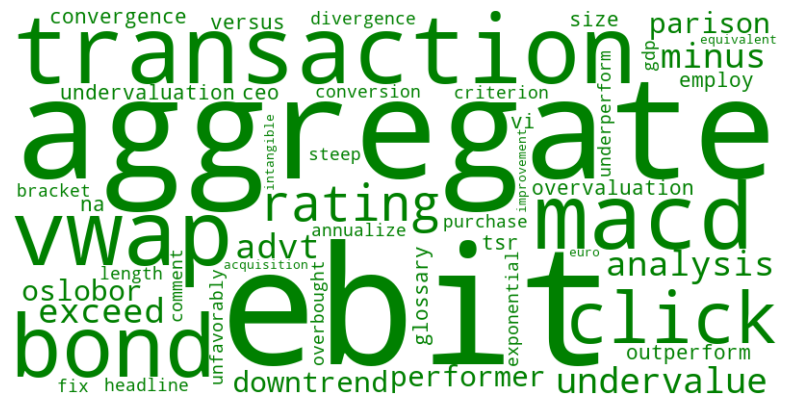

In [258]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Display the generated image:

def custom_color_func_peace(word,**kwargs):
    return 'green'


# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                      color_func=custom_color_func_peace
                     ).generate_from_frequencies(dict_peace)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


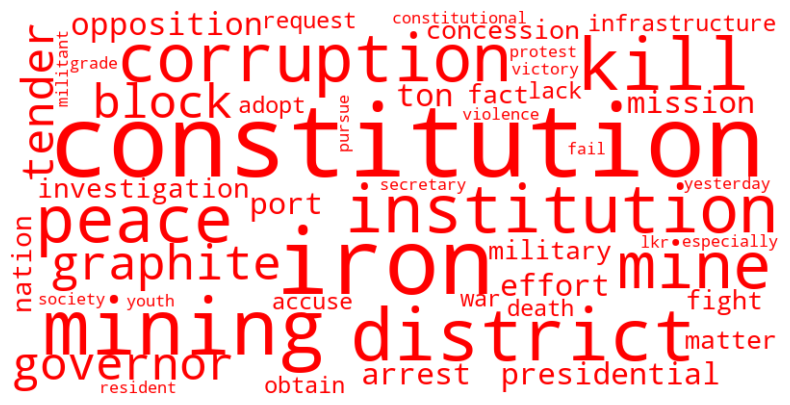

In [259]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Display the generated image:

def custom_color_func_nonpeace(word,**kwargs):
    return 'red'


# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                      color_func=custom_color_func_nonpeace
                     ).generate_from_frequencies(dict_nonpeace)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [261]:
dict_nonpeace.keys()

dict_keys(['constitution', 'iron', 'mining', 'kill', 'district', 'institution', 'corruption', 'peace', 'mine', 'graphite', 'block', 'governor', 'tender', 'opposition', 'ton', 'port', 'mission', 'arrest', 'presidential', 'effort', 'investigation', 'nation', 'concession', 'matter', 'military', 'fact', 'fight', 'infrastructure', 'request', 'obtain', 'death', 'war', 'adopt', 'lack', 'accuse', 'especially', 'secretary', 'violence', 'resident', 'lkr', 'yesterday', 'pursue', 'constitutional', 'protest', 'victory', 'youth', 'fail', 'grade', 'society', 'militant'])

In [ ]:
# CISS - IEEE
# KDD - 